# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2022/)    
## 1MS041, 2022 
&copy;2022 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

## Second notebook on Random variables

Lets take a look again at the spam dataset and look at our concepts there

In [1]:
from Utils import load_sms
sms_data = load_sms()
sms_data[:2]

[('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
  0),
 ('Ok lar... Joking wif u oni...', 0)]

Let X represents each SMS text (an entry in the list), and let $Y$ represent whether text is spam or not i.e. $Y \in \{0,1\}$. Thus $\mathbb{P}(Y = 1)$ is the probability that we get a spam. The goal is to estimate:
$$
    \mathbb{P}(Y = 1 | \text{"free" or "prize" is in } X) \enspace .
$$
That is, the probability that the SMS is spam given that "free" or "prize" occurs in the SMS. 
Hint: it is good to remove the upper/lower case of words so that we can also find "Free" and "Prize"; this can be done with `text.lower()` if `text` a string.

To do this we can create a new random variable $Z$ which is $1$ if "free" or "prize" appears in $X$.

In [2]:
interesting_words=set(['free','prize'])
TF10 = {True: 1, False: 0}
Z_obs = [TF10[not interesting_words.isdisjoint([word.lower() for word in line[0].split(' ')])] for line in sms_data]

In [3]:
Z_obs[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 1, 1]

In [4]:
Y_obs = [y for x,y in sms_data]
Y_obs[:10]

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1]

In [5]:
import numpy as np
def F_X_12(x):
    TF10 = {True: 1, False: 0}
    return np.mean([TF10[(x1 <= x[0]) and (x2 <= x[1])] for x1,x2 in zip (Y_obs,Z_obs)])

This is the JDF for this problem

In [6]:
print("\t\tz2 <= 0 \tz2 <= 1")
for x1 in range(0,2):
    print("y1 <= %d \t" % x1,end='')
    for x2 in range(0,2):
        print("%.2f" % (F_X_12((x1,x2))),end='\t\t')
    print('\n')

		z2 <= 0 	z2 <= 1
y1 <= 0 	0.86		0.87		

y1 <= 1 	0.96		1.00		



In [7]:
F_X_12((1,0))

0.9551328068916008

In [8]:
F_X_12((0,0)) == F_X_12((0,1))*F_X_12((1,0))

False

In [9]:
F_X_12((0,1))*F_X_12((1,0))

0.8270846721557743

In [10]:
# Are they indepdentent? If so, then the JDF is just the product of the 
# DFs for Y and Z, but
0.865936826992103*0.955132806891601

0.827084672155774

Which is not 0.858, so they are not independent. So lets try to estimate the probability that $Y=1$ given that $Z = 1$. Lets again do that by filtering

In [11]:
np.mean([y for z,y in zip(Z_obs,Y_obs) if z == 1])

0.812

Compare that with the marginal probability of $Y = 1$, which is according to our JDF 1-0.866 = 0.134

In [12]:
# Or we can just compute it directly
np.mean(Y_obs)

0.13406317300789664

What we see from this is that knowing that the words "free" or "prize" appeared in the sms text, we are much more certain that it is a spam. We also see that looking directly at the JDF this can be hard to see, although it is equivalent.

## Moments etc

In [13]:
import numpy as np
x = np.random.normal(size=100)

In [14]:
x

array([ 0.9779408 , -1.82096002, -1.41825327,  1.1824478 ,  0.42830425,
        0.3631051 ,  0.00415442, -0.91508469,  1.18525871, -0.02120081,
        0.10875259, -1.14020521,  1.51121772, -0.34327924, -0.11663052,
        0.29369306, -0.58676692,  1.0436514 ,  0.53954274, -0.89297968,
        0.8615047 ,  1.51465563, -0.88748896, -0.41025608,  2.1551467 ,
        0.30907698,  0.98674107, -0.17592342, -0.88262183,  0.98644476,
       -0.35718391,  0.84300875,  1.95641087, -1.91011792,  0.18667248,
       -0.55443501,  1.1820367 , -0.61728334, -1.28520236, -0.26998889,
       -0.77725481,  0.65183064,  0.85921952, -0.65310159, -0.89269049,
        3.06401957,  0.33610458, -0.34806097, -0.62133283, -1.33722722,
       -1.70530115, -0.29956294,  0.40932678,  0.03296779, -0.11719959,
        0.90170089,  1.3165244 ,  0.86548001,  0.30634628,  0.08163466,
       -0.25483559, -0.48663186,  0.08425664,  0.06830052, -0.6093532 ,
       -0.2895124 , -0.42872978,  0.70933037, -0.21264877,  0.51

## Sample mean

In [15]:
np.mean(x)

0.004152656628697149

## Sample variance

In [16]:
np.var(x)

0.9265325044255871

Or by doing it yourself

In [17]:
mu = np.mean(x)
np.mean(np.power(x-mu,2))

0.9265325044255871

Higher moments, we can use `scipy`

In [18]:
from scipy.stats import skew, kurtosis

In [19]:
skew(x)

0.15642469047221008

In [20]:
kurtosis(x,fisher=False)

3.0647436766886518

## Moments and tail behavior

In [21]:
def standardize(data):
    mean = np.mean(data)
    std = np.sqrt(np.var(data))
    return (data-mean)/std

(-3.0, 5.0)

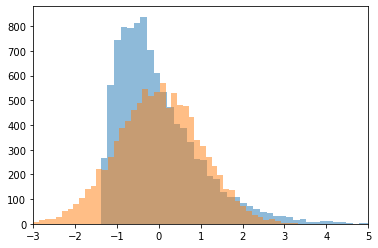

In [22]:
import numpy as np
chi2 = np.random.chisquare(4,size=10000)
normal = np.random.normal(size=10000)
import matplotlib.pyplot as plt
_=plt.hist(standardize(chi2),bins=50,alpha=0.5)
_=plt.hist(standardize(normal),bins=50,alpha=0.5)
plt.xlim(-3,5)

In [23]:
from scipy.stats import skew, kurtosis
def print_basic_stats(data):
    print("mean: %.2f\tstd: %.2f\tskew: %.2f\tkurtosis: %.2f" % (np.mean(data),np.std(data),skew(data),kurtosis(data,fisher=False)))

In [24]:
print_basic_stats(normal)

mean: -0.01	std: 1.00	skew: -0.02	kurtosis: 2.94


In [25]:
print_basic_stats(chi2)

mean: 3.99	std: 2.84	skew: 1.42	kurtosis: 5.91


In [26]:
print_basic_stats(standardize(np.sqrt(chi2)))

mean: -0.00	std: 1.00	skew: 0.42	kurtosis: 3.08


In [27]:
np.mean(np.power(normal,3)) # Skewness

-0.05118620482141925

In [28]:
np.mean(np.power(normal,9)) 

-30.34263139174127

## Transformations of random variables

Consider a Binomial random variable

In [29]:
n = 10
p = 0.5
#x = np.random.binomial(n,p,size=1000)
x = np.random.uniform(0,1, size=1000)
x

array([7.25463200e-03, 7.46120171e-01, 5.66796368e-01, 4.82506263e-01,
       6.77622412e-01, 8.66152106e-01, 5.02445234e-01, 8.34931534e-01,
       7.32937217e-02, 7.94695557e-01, 7.75097131e-01, 3.85337414e-01,
       2.11427755e-01, 1.66243632e-01, 4.12760354e-02, 6.87085539e-01,
       2.59224763e-01, 3.77168188e-01, 2.34773658e-01, 8.78197854e-01,
       8.45191052e-01, 4.31175750e-01, 9.94739483e-01, 1.17514924e-01,
       8.28934120e-01, 7.85275105e-01, 6.30520837e-01, 6.43576013e-01,
       3.38607176e-01, 4.17600004e-02, 9.51322460e-02, 5.80721256e-01,
       8.69355394e-01, 9.18812319e-01, 5.04463944e-01, 7.56575983e-01,
       7.98329181e-01, 7.88667395e-01, 9.84221661e-01, 5.82851248e-01,
       5.11108333e-01, 3.94106845e-01, 1.57582509e-01, 1.93358886e-01,
       1.23996371e-01, 7.44229811e-01, 4.71975239e-01, 6.39241024e-01,
       8.54138837e-01, 9.43558541e-01, 1.12342878e-01, 9.21067965e-01,
       6.27052569e-01, 8.31513005e-02, 7.36574727e-02, 9.69110110e-01,
      

Lets plot the empirical density

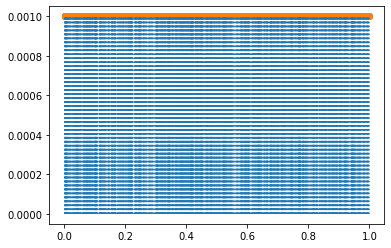

In [30]:
from Utils import makeEMF,makeEDF,plotEDF,plotEMF
plotEMF(makeEMF(x))

If we had the function $g(x) = \sin(x/3)$

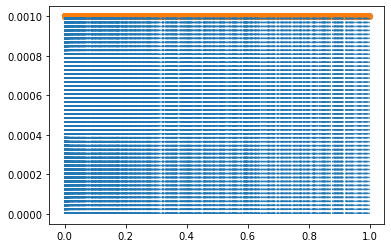

In [31]:
plotEMF(makeEMF(np.power(x, 2)))

sub-gaussian mean
mean: -0.00	std: 0.04	skew: -2.93	kurtosis: 35.00
sub-exp mean
mean: -0.00	std: 1.00	skew: -0.86	kurtosis: 14.86
sub-gaus var
mean: 0.25	std: 0.03	skew: -2.19	kurtosis: 22.26
sub-exp var
mean: 0.98	std: 0.19	skew: 0.51	kurtosis: 10.29
sub-gaus 3 mom
mean: -0.00	std: 0.04	skew: -1.39	kurtosis: 21.84
sub-gaus 4 mom
mean: -0.00	std: 0.04	skew: -1.39	kurtosis: 21.84
burn 10 mom
mean: 0.50	std: 0.04	skew: 0.12	kurtosis: 48.41


Text(0.5, 1.0, 'Correct Plot:\nBut uses to many lines to unpack li')

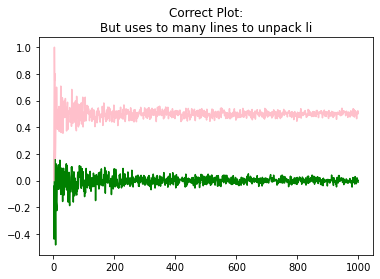

In [37]:
#plotEDF(makeEDF(np.power(x, 2)))

mean_x1 = []
mean_x1_10 = []
mean_x2 = []
mean_x3 = []
x3_var = []
x4_var = []
mean_x3_3 = []
mean_x3_4 = []
mean_x4 = []
num = []
for n in range(1,1000):
    num.append(n)
    x1 = np.random.binomial(1,p=0.5,size=n)
    x2 = np.random.uniform(0,1, size=n)
    x3 = np.random.normal(scale=0.5, size=n)
    x3_ = np.random.normal(scale=1, size=n)
    x4 = np.random.exponential(size=n)
    mean_x1_10.append(np.mean(np.power(x1, 10)))
    mean_x1.append(np.mean(np.power(x1, 1)))
    mean_x2.append(np.mean(x2))
    mean_x3_3.append(np.mean(np.power(x3, 3)))
    mean_x3_4.append(np.mean(np.power(x3, 4)))
    x3_var.append(np.var(x3))
    x4_var.append(np.var(x4))
    mean_x3.append(np.mean(x3))
    mean_x4.append(np.mean(x4))
_=plt.hist(standardize(x3_),bins=50,alpha=0.5)    
_=plt.hist(standardize(x3),bins=50,alpha=0.5)
plt.xlim(-3,5)

print('sub-gaussian mean')
print_basic_stats(mean_x3)
print('sub-exp mean')
print_basic_stats(standardize(mean_x4))
print('sub-gaus var')
print_basic_stats(x3_var)
print('sub-exp var')
print_basic_stats(x4_var)
print('sub-gaus 3 mom')
print_basic_stats(mean_x3_3)
print('sub-gaus 4 mom')
print_basic_stats(mean_x3_4)
print('burn 10 mom')
print_basic_stats(mean_x1_10)
#plt.plot(num, mean_x3_4, 'b')
#plt.plot(num, mean_x3_3, 'r')
#plt.plot(num, mean_x4, 'y')
#plt.plot(num, mean_x3, 'g')

#plt.plot(num, x4_var, 'g')
#plt.plot(num, x3_var, 'orange')

plt.plot(num, mean_x1_10, 'pink')

plt.title('Correct Plot:\nBut uses to many lines to unpack li')   
    
    

Can we compute this thing?
What is $\sin^{[-1]}$?

Since $X$ is discrete, we can check what $\mathbb{Y}$ is, since $\mathbb{X}=\{0,1,\ldots,10\}$.

In [33]:
Y_space = np.sort(np.sin(np.arange(0,11)))
sin_inv = dict(zip(np.sin(np.arange(0,11)),np.arange(0,11)))

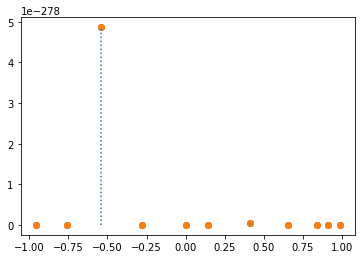

In [34]:
from scipy.special import binom as binomial
plotEMF([(y,binomial(n,sin_inv[y])*(p**sin_inv[y])*((1-p)**(n-sin_inv[y]))) for y in Y_space])

In [35]:
plotEDF(emfToEdf([(y,binomial(n,sin_inv[y])*(p**sin_inv[y])*((1-p)**(n-sin_inv[y]))) for y in Y_space]))

NameError: name 'emfToEdf' is not defined